<a href="https://colab.research.google.com/github/kelvin-Ferreira/Analise-de-sinais-e-sistemas-/blob/main/TransitionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz A:
 [[-3.  1.  0.]
 [ 1. -3.  0.]
 [ 0.  0. -3.]]
Matriz A**2:
 [[10. -6.  0.]
 [-6. 10.  0.]
 [ 0.  0.  9.]]
Matriz A**3:
 [[-36.  28.   0.]
 [ 28. -36.   0.]
 [  0.   0. -27.]]
Matriz A**4:
 [[ 136. -120.    0.]
 [-120.  136.    0.]
 [   0.    0.   81.]]
Matriz A**5:
 [[-528.  496.    0.]
 [ 496. -528.    0.]
 [   0.    0. -243.]]

Matriz de Transicao (Taylor):
 <bound method MatrixDeterminant.det of Matrix([
[-4.4*t**5 + 5.6667*t**4 - 6.0*t**3 + 5.0*t**2 - 3.0*t + 1.0,     4.1333*t**5 - 5.0*t**4 + 4.6667*t**3 - 3.0*t**2 + 1.0*t,                                                            0],
[    4.1333*t**5 - 5.0*t**4 + 4.6667*t**3 - 3.0*t**2 + 1.0*t, -4.4*t**5 + 5.6667*t**4 - 6.0*t**3 + 5.0*t**2 - 3.0*t + 1.0,                                                            0],
[                                                          0,                                                           0, -2.025*t**5 + 3.375*t**4 - 4.5*t**3 + 4.5*t**2 - 3.0*t + 1.0]])>


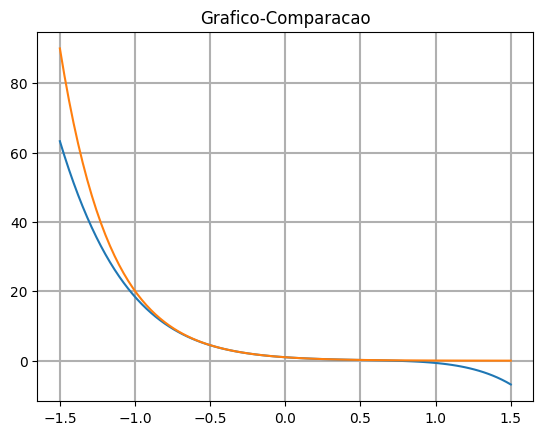

In [ ]:
#Taylor

import numpy as np
from sympy import symbols
import sympy as sp
from sympy import *
from sympy.matrices import Matrix

A = np.array([[-3.0,1.0,0.0],[1.0,-3.0,0.0],[0.0,0.0,-3.0]])
I= np.identity(3)
A2 = np.matmul(A,A)
A3 = np.matmul(A,A2)
A4 = np.matmul(A,A3)
A5 = np.matmul(A,A4)
t = symbols('t')

Tmat = sp.Matrix(I+A*t+(A2*((t**2)/np.math.factorial(2)))+(A3*((t**3)/np.math.factorial(3)))+(A4*((t**4)/np.math.factorial(4)))+(A5*((t**5)/np.math.factorial(5))))

# Comparação do polinomio em taylor (reta em azul) com a função exata (reta em laranja) do membro M 3x3 da matriz de transição.
# Podemos observar que o polinomio tem um valor proximo ao exato apena por um curto periodo, oque pode querer dizer que a ordem "k=5" usada na resolução foi pequena demais. 

print('Matriz A:\n',A)
print('Matriz A**2:\n',A2)
print('Matriz A**3:\n',A3)
print('Matriz A**4:\n',A4)
print('Matriz A**5:\n',A5)

print('\nMatriz de Transicao (Taylor):\n',(Tmat.evalf(5)).det)

x= np.linspace(-1.5, 1.5, 100)
y = -2.025*x**5 + 3.375*x**4 - 4.5*x**3 + 4.5*x**2 - 3.0*x + 1.0
plt.plot(x,y)
plt.plot(x,np.exp(-3*x))
plt.grid(linewidth = 1.5)
plt.title("Grafico-Comparacao")
plt.show()

Matriz A-I*lambda:
 <bound method MatrixDeterminant.det of Matrix([
[-L - 3.0,      1.0,        0],
[     1.0, -L - 3.0,        0],
[       0,        0, -L - 3.0]])>

Determinante de A-I*lambda (autovalores de A):
 -1.0*L**3 - 9.0*L**2 - 26.0*L - 24.0


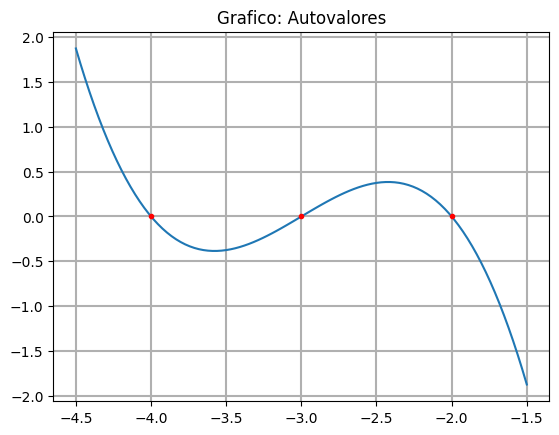

In [ ]:
#Caylay-Hamilton P1

import numpy as np
from sympy import symbols
import sympy as sp
from sympy import *
from sympy.matrices import Matrix
import matplotlib.pyplot as plt

A = np.array([[-3.0,1.0,0.0],[1.0,-3.0,0.0],[0.0,0.0,-3.0]])
t = symbols('t')
L = symbols('L') #Lambda
IxL = np.array([[L,0.0,0.0],[0.0,L,0.0],[0.0,0.0,L]])
mAuto = sp.Matrix(A-(IxL))
det = mAuto.det()

print('Matriz A-I*lambda:\n', mAuto.det)
print('\nDeterminante de A-I*lambda (autovalores de A):\n', det)

#Grafico da função para determinar os autovalores (Zeros da funcao)
x= np.linspace(-4.5, -1.5, 100)
y = ((-x**3)-(9*x**2)-(26*x)-24)
plt.plot(x,y)
plt.grid(linewidth = 1.5)
plt.plot(-4,0, ".", color="red")
plt.plot(-3,0, ".", color="red")
plt.plot(-2,0, ".", color="red")
plt.title("Grafico: Autovalores")

plt.show()

In [ ]:
#Caylay-Hamilton P2

import numpy as np
from sympy import symbols
import sympy as sp
from sympy import *
from sympy.matrices import Matrix

A = np.array([[-3.0,1.0,0.0],[1.0,-3.0,0.0],[0.0,0.0,-3.0]])
I = np.identity(3)
A2 = np.matmul(A,A)
t, e = symbols('t,e')
l0, l1, l2= -2, -3, -4 #Valores encontrados na P1
l, j, k = -1, 0, 0
mat = np.array([[l0**0 ,l0,l0**2],[l1**0 ,l1,l1**2],[l2**0 ,l2,l2**2]])
b = np.array([[e**(l0*t)],[e**(l1*t)],[e**(l2*t)]])
matEx = np.concatenate((mat,b), axis = 1)

while l==-1:
  for j in range(4):
    if matEx[0][j]!=0:
        l=j
        break
while k<3 :
  for i in range(3):
    aux=matEx[i][l]
    for j in range(4):
      if i>k and matEx[i][j]!=0:
          matEx[i][j]=matEx[i][j]-(matEx[k][j]*(aux/matEx[k][l]))
  k+=1
  if l<4-1:
    l+=1  

x = np.array([[0],[0],[matEx[2][3]/matEx[2][2]]])
x[1][0] = (matEx[1][3]-x[2][0]*matEx[1][2])/matEx[1][1]
x[0][0] = (matEx[0][3]-x[2][0]*matEx[0][2]-x[1][0]*matEx[0][1])/matEx[0][0]

print('Epsilon 0: ', x[0][0])
print('\nEpsilon 1: ', x[1][0])
print('\nEpsilon 2: ', x[2][0])

MaTr = I*x[0][0]+A*x[1][0]+A2*x[2][0]
MaTr = sp.Matrix(MaTr)
print('\nMatriz de Transicao (Caylay-Hamilton):\n', MaTr.det)


Epsilon 0:  6.0/e**(2*t) - 8.0/e**(3*t) + 3.0/e**(4*t)

Epsilon 1:  3.5/e**(2*t) - 6.0/e**(3*t) + 2.5/e**(4*t)

Epsilon 2:  0.5/e**(2*t) - 1.0/e**(3*t) + 0.5/e**(4*t)

Matriz de Transicao (Caylay-Hamilton):
 <bound method MatrixDeterminant.det of Matrix([
[0.5/e**(2*t) + 0.5/e**(4*t), 0.5/e**(2*t) - 0.5/e**(4*t),            0],
[0.5/e**(2*t) - 0.5/e**(4*t), 0.5/e**(2*t) + 0.5/e**(4*t),            0],
[                          0,                           0, 1.0/e**(3*t)]])>


In [ ]:
#Transfromada de Laplace

import numpy as np
from sympy import symbols
import sympy as sp
from sympy import *
from sympy.matrices import Matrix

A = np.array([[-3.0,1.0,0.0],[1.0,-3.0,0.0],[0.0,0.0,-3.0]])
I = np.identity(3)
A2 = np.matmul(A,A)
t, e, s = symbols('t,e,s')
Is = np.array([[s,0.0,0.0],[0.0,s,0.0],[0.0,0.0,s]])
IsmA = Is-A
IsmA = sp.Matrix(IsmA) 
invIsmA = IsmA.inv()
det = IsmA.det()
matCoT = det*invIsmA

print("\nMatriz sI-A:\n", sp.Matrix(IsmA).det)
print("\nDeterminante da matriz sI-A:\n", det)
print("\nMatriz transposta dos cofatores de sI-A:\n", matCoT.det)
print("\nInversa da matriz sI-A\n", invIsmA.det)


Matriz sI-A:
 <bound method MatrixDeterminant.det of Matrix([
[s + 3.0,    -1.0,       0],
[   -1.0, s + 3.0,       0],
[      0,       0, s + 3.0]])>

Determinante da matriz sI-A:
 1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0

Matriz transposta dos cofatores de sI-A:
 <bound method MatrixDeterminant.det of Matrix([
[(1.0*s + 3.0)*(1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0)/(1.0*s**2 + 6.0*s + 8.0),           1.0*(1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0)/(1.0*s**2 + 6.0*s + 8.0),                                               0],
[          1.0*(1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0)/(1.0*s**2 + 6.0*s + 8.0), (1.0*s + 3.0)*(1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0)/(1.0*s**2 + 6.0*s + 8.0),                                               0],
[                                                                           0,                                                                            0, (1.0*s**3 + 9.0*s**2 + 26.0*s + 24.0)/(s + 3.0)]])>

Inversa da matriz sI-A
 <bound method MatrixDeterminant.det of Mat